In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Classes/Objects

### Almost everything in Python is an **object**. **Classes** in Python are synonymous with data types. Objects are units of a particular class. Take e.g:

In [2]:
x = 1 #Data type is Int.
print(type(x))

<class 'int'>


### Here's another simple example of a class:

In [3]:
def stupidfunction():
    return 10.
 
x = stupidfunction()
print(type(stupidfunction) )
print(type(x ) )


<class 'function'>
<class 'float'>


### I.e, we assigned the variable x to an object of class 'float' corresponding to the output of the function above. The function itself is, as you'd expect, of type 'function'. 

### 'float' is one of the simplest objects in Python, with almost no distinct tasks assigned to its respective objects. We call the labeled tasks that execute code on objects **methods**. Let's define our first class:

In [4]:
class Brandon: #Defining class.
    def speak(self):
        print("die nuno")

sike = Brandon()

In [5]:
print(type(sike))
sike.speak()

<class '__main__.Brandon'>
die nuno


### Here we define the class Brandon. All Brandons tell Nuno to die. Brandon Sike does so in particular. Defining a class is done with the **class** keyword. 

### We can define the methods inside our class with the typical function formalism. We pass the keyword **self** as an argument to refer the method to the instance of its class. However, we can pass additional arguments that will be used when defining the class.

### Finally, we can define an **attribute** of the class by assigning a variable inside the class. We can also instantiate the attribute with the **\_\_init\_\_** function name. When this is done, the attribute can be referenced inside of methods by using self.\<attribute\>.

In [6]:
class gorilla:
    height = "6 foot" #Attribute 1
    hairy = "yes" #Attribute 2

    def __init__(self,victim):
        self.victim = victim
        
    def hit(self):
        print("ooh ooh ahh ahh I hit {}".format(self.victim))

jeffrey = gorilla("Kian")


In [7]:
print(jeffrey.height)
print(jeffrey.hairy)
print(jeffrey.victim)

6 foot
yes
Kian


In [8]:
jeffrey.hit()

ooh ooh ahh ahh I hit Kian


## Ex: **Defining a Complex Number**

In [9]:
class comp:
    def __init__(self, real, imag):
        self.real = real
        self.imag = imag
        self.vector = [self.real, self.imag]
        self.conjugate = [self.real, -self.imag]
        
    def add(self, real2, imag2):
        return [self.real+real2, self.imag+imag2]
                
    def abs(self):
        return np.sqrt(self.real**2+self.imag**2)

c = comp(3,4)

In [10]:
print(c.real)
print(c.imag)
print(c.vector)
print(c.conjugate)
print(c.abs() )

3
4
[3, 4]
[3, -4]
5.0


In [11]:
print(c.add(2,1))

[5, 5]


# Inheritance

### **Inheritance** refers to the ability of a class to pass down attributes or methods to a new class. To do this, we pass the parent class as an argument to the new class. This allows your code to be recycled easily, and draws connections to real-life object/type hierarchy. 

In [12]:
class parent:
    def __init__(self, eye_color, height):
        self.eye_color = eye_color
        self.height = height
    
    def characteristics(self):
        print("Eye color is {}.".format(self.eye_color))
        print("Height is {} feet.".format(self.height))
    
class son(parent):
    def __init__(self,  eye_color, height, sport):
        parent.__init__(self, eye_color, height)
        self.sport = sport

kian = son( "brown", "6'7","league of legends")

In [13]:
kian.characteristics()

Eye color is brown.
Height is 6'7 feet.


# Polymorphism

### What makes objects and classes so intuitive is the analogies they possess to "types" or "sets". I.e, with objects, we can assign relevant categories to variables with well-defined parameters. To add to this analogy, we can consider the effect that having a particular trait might have on the object and its methods. 

### We define polymorphism as the dependence of methods on their respective inputs. We can see polymorphism in functions as well:

In [14]:
def add(x,y):
    return x+y

In [15]:
print(add(2,3))
print(add("hi" ," guys"))

5
hi guys


### When the input is a number, "add" returns the sum of its inputs. When the input is a string, "add" returns the strings concantenated together.

### Let's define a daughter class like the son class before, but let's override the "characteristics" method to include the sport and name of the daugher class.

In [16]:
class daughter(parent):
    def __init__(self,  eye_color, height, sport, name):
        parent.__init__(self, eye_color, height)
        self.sport = sport
        self.name = name
    
    def characteristics(self):
        print("Name is {}.".format(self.name))
        print("Sport played is {}.".format(self.sport))
        print("Eye color is {}.".format(self.eye_color))
        print("Height is {} feet.".format(self.height))
    
ME = daughter("Blue", "7'8", "Badminton", "Nuno")

In [17]:
ME.characteristics()

Name is Nuno.
Sport played is Badminton.
Eye color is Blue.
Height is 7'8 feet.


## Ex: Subsets of the Real Numbers

In [18]:
class Real:
    def __init__(self, lower_bound,upper_bound):
        self.lower_bound = lower_bound
        self.upper_bound = upper_bound
        self.line = np.linspace(self.lower_bound,self.upper_bound, 1001)
    
    def sums(self):
        return round(sum(self.line),3)
    def avg(self):
        return round(sum(self.line)/np.size(self.line), 3)


arr = Real(-10,10)
print(arr.sums())
print(arr.avg())


0.0
0.0


In [19]:
class positive_real(Real):
    def __init__(self, lower_bound,upper_bound):
        Real.__init__(self, lower_bound, upper_bound)
        idx = np.where(self.line>0)
        self.line = self.line[idx]
    
        
arr = positive_real(-10,10)
#print(arr.line)

print(arr.sums())
print(arr.avg())


2505.0
5.01


In [20]:
class Naturals(positive_real):
    def __init__(self, lower_bound,upper_bound):
        positive_real.__init__(self, lower_bound, upper_bound)
        idxs = np.where(np.mod(self.line, 1)== 0)
        self.line = self.line[idxs]
    
        
arr = Naturals(-10,10)

print(arr.line)
print(arr.sums())
print(arr.avg())

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
55.0
5.5


In [21]:
def prime_test(ns):
    vals = np.array([])
    for j in ns:
        count = 0
        for i in range(1,int(j+1)):
            if j % i == 0:
                count = count+1
        if count > 2:
            vals = np.append(vals, 0)
        else:
            vals = np.append(vals, 1)
    
    return vals
        
class Primes(Naturals):
    def __init__(self, lower_bound,upper_bound):
        Naturals.__init__(self, lower_bound, upper_bound)
        idxs = np.where(prime_test(self.line) == 1)
        self.line = self.line[idxs]
        
arr = Primes(-10,10)

print(arr.line)
print(arr.sums())
print(arr.avg())

[1. 2. 3. 5. 7.]
18.0
3.6


# Encapsulation

### **Encapsulation** refers to the practice of preventing the access of data inside objects. For example, we can allow data to be protected in our class by prefixing the name of the attribute with and underscore. This allows class attributes to be referenced by the class itself, and any subclasses.

In [22]:
class bill:
    def __init__(self, price,tax):
        self.price = price
        self.tax = tax
        self.adjusted = self.price*(1+self.tax)

hamburgah = bill(10, 0.08)
print(hamburgah.adjusted)

hamburgah.adjusted = 0
print(hamburgah.adjusted)


10.8
0


In [23]:
class bill:
    def __init__(self, price,tax):
        self._price = price
        self._tax = tax
        self._adjusted = self._price*(1+self._tax)
        
hamburgah2 = bill(10, 0.08)

hamburgah2.adjusted = 0
print(hamburgah2.adjusted)
print(hamburgah2._adjusted)


0
10.8


### Adding two underscores makes an attribute **private**, which means it cannot be accessed by a subclass of the parent class.

In [24]:
class bill:
    def __init__(self, price,tax):
        self.price = price
        self.tax = tax
        self.__adjusted = self.price*(1+self.tax)

class dine_in:
    def __init__(self,price,tax):
        bill.__init__(self, price, tax)
        self.tipped = self.adjusted+self.price*0.2

pf_changs = dine_in(50, 0.08)
        

AttributeError: 'dine_in' object has no attribute 'adjusted'

# Abstraction

### **Data abstraction** involves the definition of a broad method implemented in the parent class that is defined individually for the subclass. The outcome of this practice is the internal definition of a method that is hidden from the user. To implement abstract methods/classes in Python, we must import the following packages:

In [25]:
from abc import ABC, abstractmethod

### We pass ABC as an argument, to indicate an abstract class. When defining an abstract method, we add @abstractmethod to the line prior to the definition. Abstract methods can be referred to by the use of the super() keyword. Additionally, each subclass of an abstract class has to define an implementation of the abstract method.

In [26]:
class human(ABC):
    def speak(self):
        print("yo wassup")
    
    @abstractmethod
    def think(self):
        print("I'm thinking of something...")


class kian(human):
    def think(self):
        super().think()
        print("hamburger")

lak = kian()

In [27]:
lak.speak()
lak.think()

yo wassup
I'm thinking of something...
hamburger


In [28]:
class kian(human):
    pass

lak = kian()

TypeError: Can't instantiate abstract class kian with abstract methods think

## Ex: **Plotting Methods**

In [29]:
class functionplot(ABC):
    def __init__(self, x,y):
        self.x = x
        self.y = y
    @abstractmethod
    def plotly(self):
        plt.plot(self.x,self.y)
        plt.show() #Try commenting this out!

        
class scatter(functionplot):
    def __init__(self, x,y):
        functionplot.__init__(self, x, y)
    
    def plotly(self):
        super().plotly()
        plt.scatter(self.x,self.y)
        plt.show()

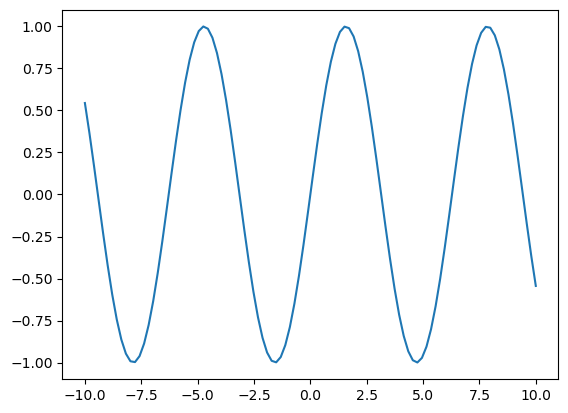

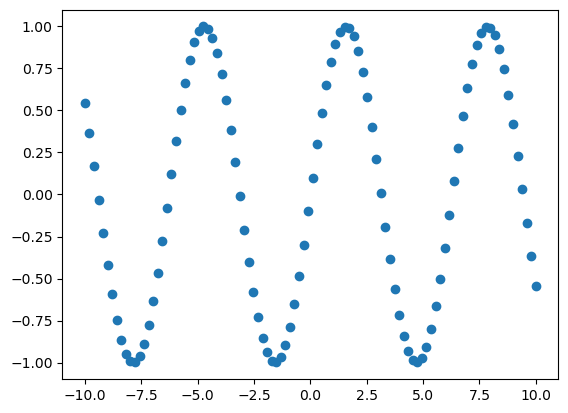

In [30]:
x = np.linspace(-10,10,100)
y = np.sin(x)
    
plot1 = scatter(x,y)

plot1.plotly()

(2, 200, 200)


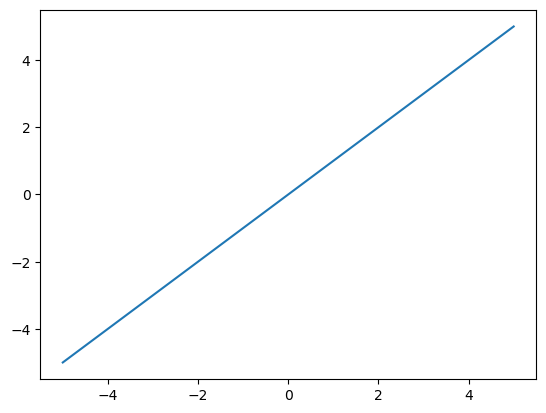

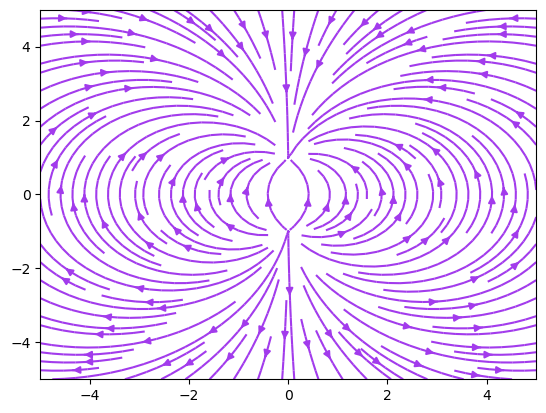

In [31]:
x = np.linspace(-5,5,200)
y = x

def vect(x,y):
    x0 = x[:,None]
    y0 = y[None,:]
    u = (x0 + 1)/((x0+1)**2 + y0**2) - (x0 - 1)/((x0-1)**2 + y0**2)
    v = y0/((x0+1)**2 + y0**2) - y0/((x0-1)**2 + y0**2)
    return [u,v]


class vectorfield(functionplot):
    def __init__(self, x,y, func):
        functionplot.__init__(self, x, y)
        self.u, self.v = func(x,y)
    
    def plotly(self):
        super().plotly()
        plt.streamplot(self.x,self.y, self.v, self.u,density=1.4, linewidth=None, color='#A23BEC')

vec = vectorfield(x,y,vect)

print(np.shape(vect(x,y)))
vec.plotly() 